# **EDA of Freelance Jobs Market Analysis & Future Demand**.

- ## Author: Muhammad Altaf Samin
- ## Location: Pakistan

> LinkedIn: [Link](https://www.linkedin.com/in/muhammad-altaf-samin-862925342?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

> GitHub: [Link](https://github.com/muhammad-altaf-samin)

- Date: 12/30/2025

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
data = pd.read_csv("/kaggle/input/top-freelance-job-roles-and-demand-statistics/freelance_jobs_2025.csv")

In [4]:
data.head()

,Job title,Hourly rate range,Annual openings (BLS)
0,Machine learning engineer,$10 – $200,"40,300"
1,Cybersecurity developer,$10 – $200,"182,800"
2,AI or prompt engineer,$10 – $200,"40,300"
3,Financial consultant,$10 – $200,"326,000"
4,Blockchain developer,$10 – $200,"1,895,500"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job title              26 non-null     object
 1   Hourly rate range      26 non-null     object
 2   Annual openings (BLS)  26 non-null     object
dtypes: object(3)
memory usage: 756.0+ bytes


In [6]:
data.shape

(26, 3)

In [7]:
data.isnull().sum()

Job title                0
Hourly rate range        0
Annual openings (BLS)    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data['Annual openings (BLS)'] = data['Annual openings (BLS)'].str.replace(',', '').astype(float)

In [10]:
data.describe()

,Annual openings (BLS)
count,2.600000e+01
mean,6.233192e+05
std,8.093019e+05
min,4.030000e+04
25%,1.231250e+05
50%,2.149000e+05
75%,9.268500e+05
max,3.453100e+06


In [11]:
data[['Hourly rate min', 'Hourly rate max']] = data['Hourly rate range'].str.split(' – ', expand=True)

In [12]:
data['Hourly rate min'] = data['Hourly rate min'].str.replace('$', '').astype(float)
data['Hourly rate max'] = data['Hourly rate max'].str.replace('$', '').astype(float)
data['Hourly rate avg'] = (data['Hourly rate min'] + data['Hourly rate max']) / 2

In [13]:
data.describe()

,Annual openings (BLS),Hourly rate min,Hourly rate max,Hourly rate avg
count,2.600000e+01,26.0,26.0,26.0
mean,6.233192e+05,10.0,200.0,105.0
std,8.093019e+05,0.0,0.0,0.0
min,4.030000e+04,10.0,200.0,105.0
25%,1.231250e+05,10.0,200.0,105.0
50%,2.149000e+05,10.0,200.0,105.0
75%,9.268500e+05,10.0,200.0,105.0
max,3.453100e+06,10.0,200.0,105.0


In [14]:
# Create a beautiful color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
          '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9',
          '#F8C471', '#82E0AA', '#F1948A', '#85C1E9', '#D7BDE2',
          '#F9E79F', '#A9DFBF', '#F5CBA7', '#D4E6F1', '#FAD7A0',
          '#D5DBDB', '#F1948A', '#A9CCE3', '#ABEBC6', '#F9E79F', '#D4EFDF']

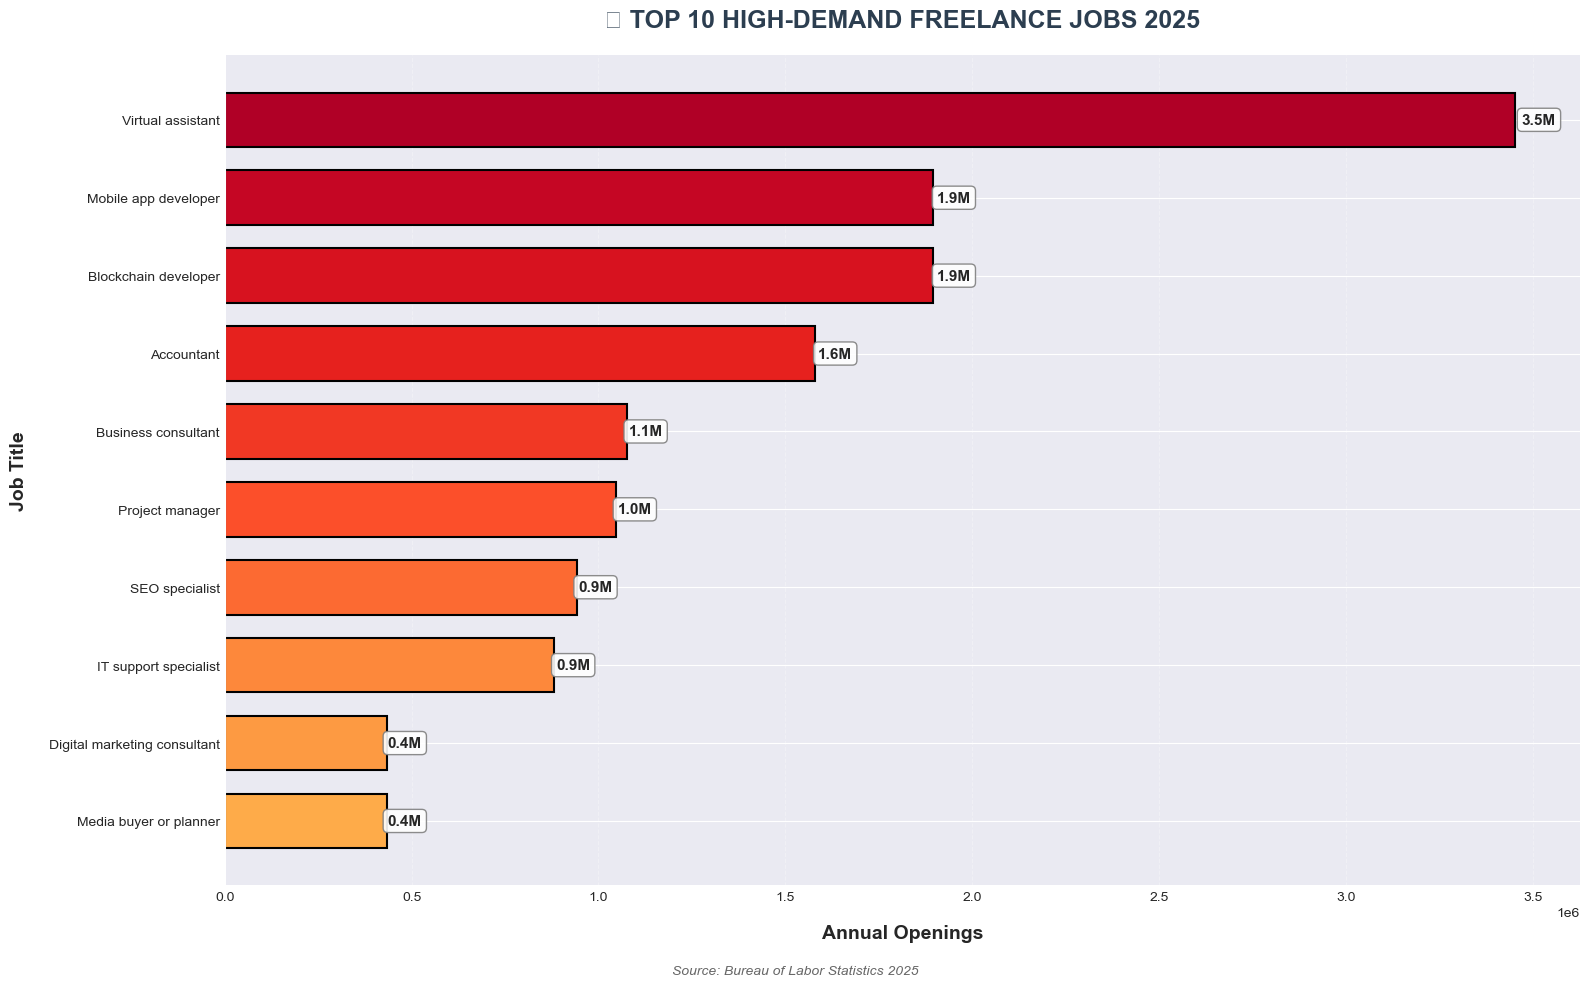

In [15]:
plt.figure(figsize=(16, 10))
top_10 = data.nlargest(10, 'Annual openings (BLS)').sort_values('Annual openings (BLS)', ascending=True)

# Create gradient colors
gradient_colors = plt.cm.YlOrRd(np.linspace(0.4, 0.9, len(top_10)))

bars = plt.barh(top_10['Job title'], top_10['Annual openings (BLS)'], 
                color=gradient_colors, edgecolor='black', linewidth=1.5, height=0.7)

# Add data labels with formatted values
for i, (bar, val) in enumerate(zip(bars, top_10['Annual openings (BLS)'])):
    value_millions = val / 1000000
    plt.text(val + val*0.005, bar.get_y() + bar.get_height()/2, 
             f'{value_millions:,.1f}M', 
             va='center', ha='left', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.title('🔥 TOP 10 HIGH-DEMAND FREELANCE JOBS 2025', 
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')
plt.xlabel('Annual Openings', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Job Title', fontsize=14, fontweight='bold', labelpad=15)

# Customize grid and spines
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Add watermark
plt.text(0.5, 0.02, 'Source: Bureau of Labor Statistics 2025', 
         transform=plt.gcf().transFigure, ha='center', 
         fontsize=10, style='italic', alpha=0.7)

plt.tight_layout()
plt.show()

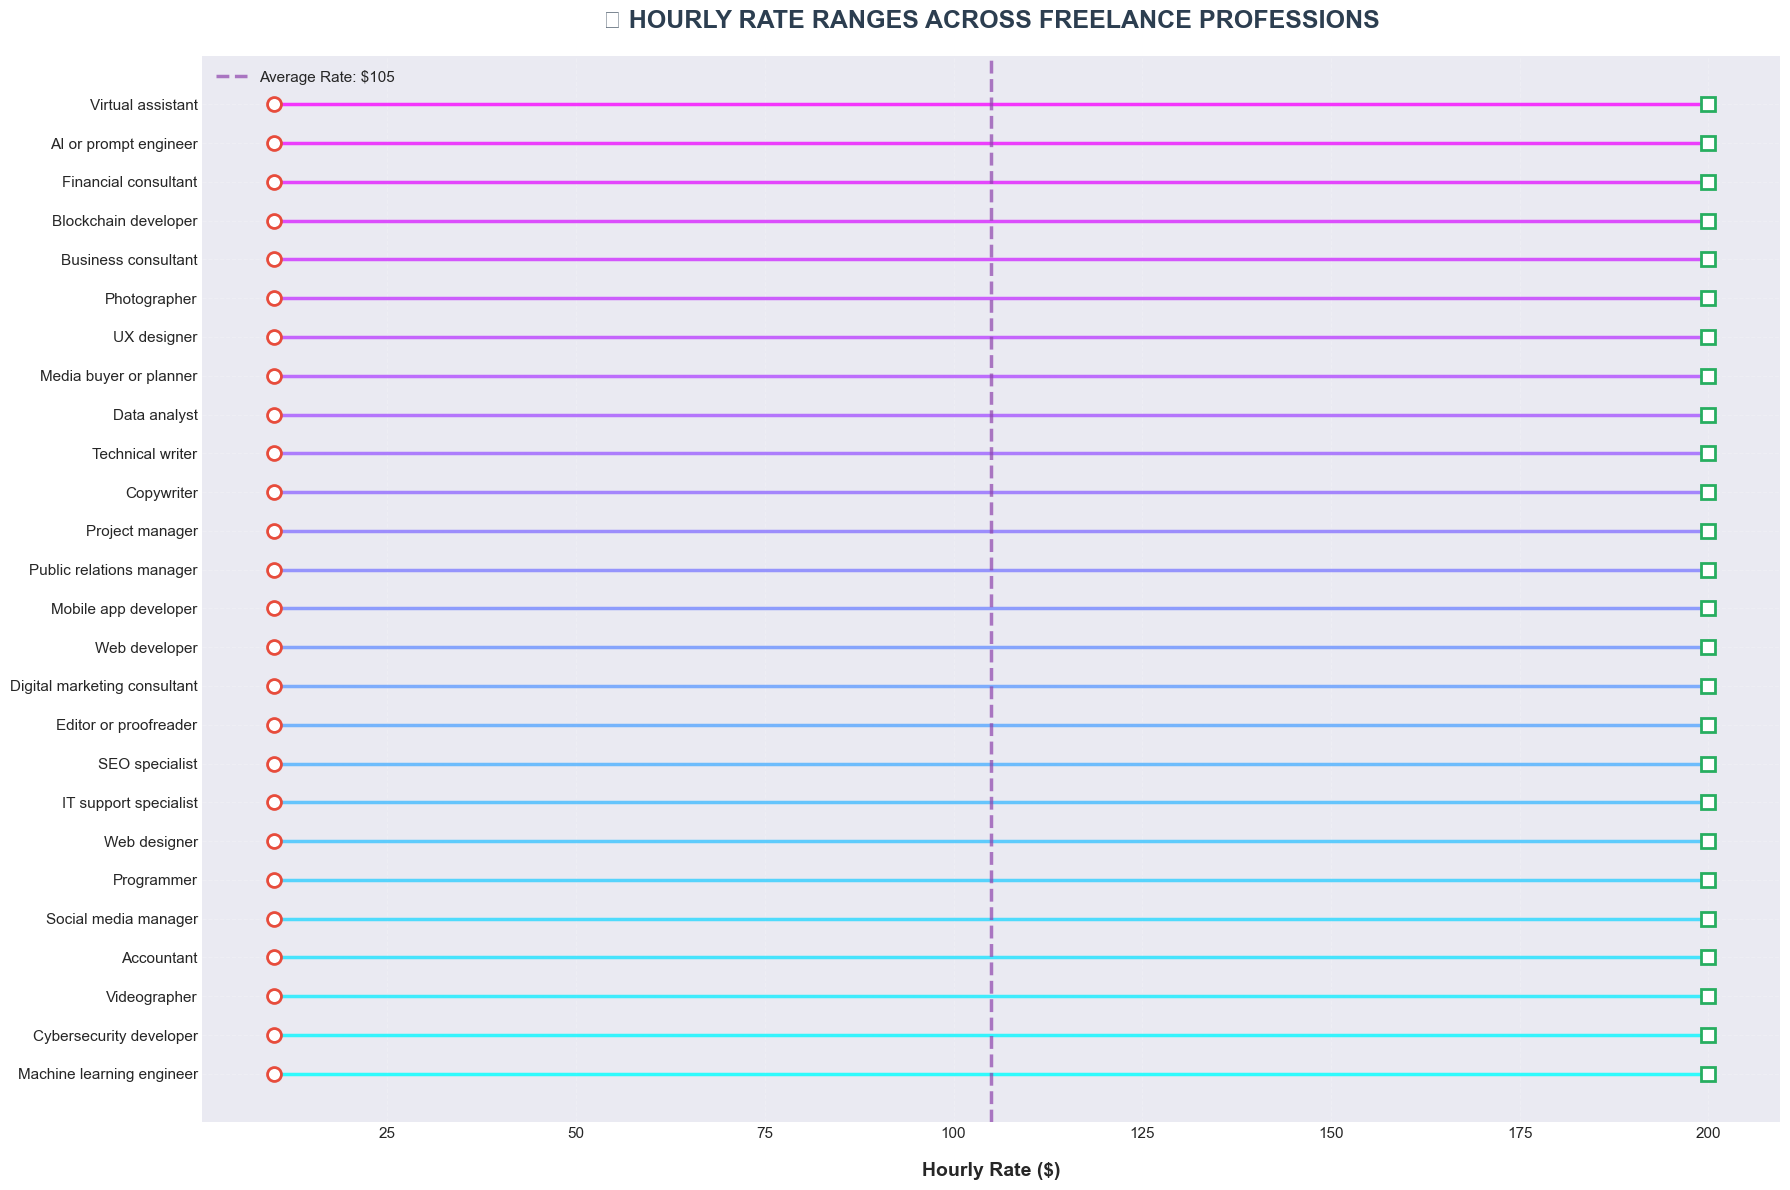

In [16]:
plt.figure(figsize=(18, 12))
data_sorted = data.sort_values('Hourly rate avg', ascending=False)

# Create lollipop chart
for i, (idx, row) in enumerate(data_sorted.iterrows()):
    # Main line
    plt.plot([row['Hourly rate min'], row['Hourly rate max']], [i, i], 
             'o-', linewidth=2.5, markersize=8, 
             color=plt.cm.cool(i/len(data_sorted)), alpha=0.8)
    
    # Min and max markers with different styles
    plt.plot(row['Hourly rate min'], i, 'o', markersize=10, 
             markerfacecolor='white', markeredgecolor='#E74C3C', 
             markeredgewidth=2)
    plt.plot(row['Hourly rate max'], i, 's', markersize=10, 
             markerfacecolor='white', markeredgecolor='#27AE60', 
             markeredgewidth=2)

plt.yticks(range(len(data_sorted)), data_sorted['Job title'], fontsize=11)
plt.xticks(fontsize=11)
plt.xlabel('Hourly Rate ($)', fontsize=14, fontweight='bold', labelpad=15)
plt.title('💰 HOURLY RATE RANGES ACROSS FREELANCE PROFESSIONS', 
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

# Add legend
min_patch = plt.Line2D([0], [0], marker='o', color='w', 
                       markerfacecolor='white', markersize=10,
                       markeredgecolor='#E74C3C', markeredgewidth=2,
                       label='Minimum Rate')
max_patch = plt.Line2D([0], [0], marker='s', color='w', 
                       markerfacecolor='white', markersize=10,
                       markeredgecolor='#27AE60', markeredgewidth=2,
                       label='Maximum Rate')
plt.legend(handles=[min_patch, max_patch], loc='upper right', 
           fontsize=11, frameon=True, fancybox=True)

# Add average rate line
avg_rate = data['Hourly rate avg'].mean()
plt.axvline(x=avg_rate, color='#8E44AD', linestyle='--', 
            linewidth=2.5, alpha=0.7, label=f'Average Rate: ${avg_rate:.0f}')
plt.legend(loc='upper left', fontsize=11)

plt.grid(True, alpha=0.2, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

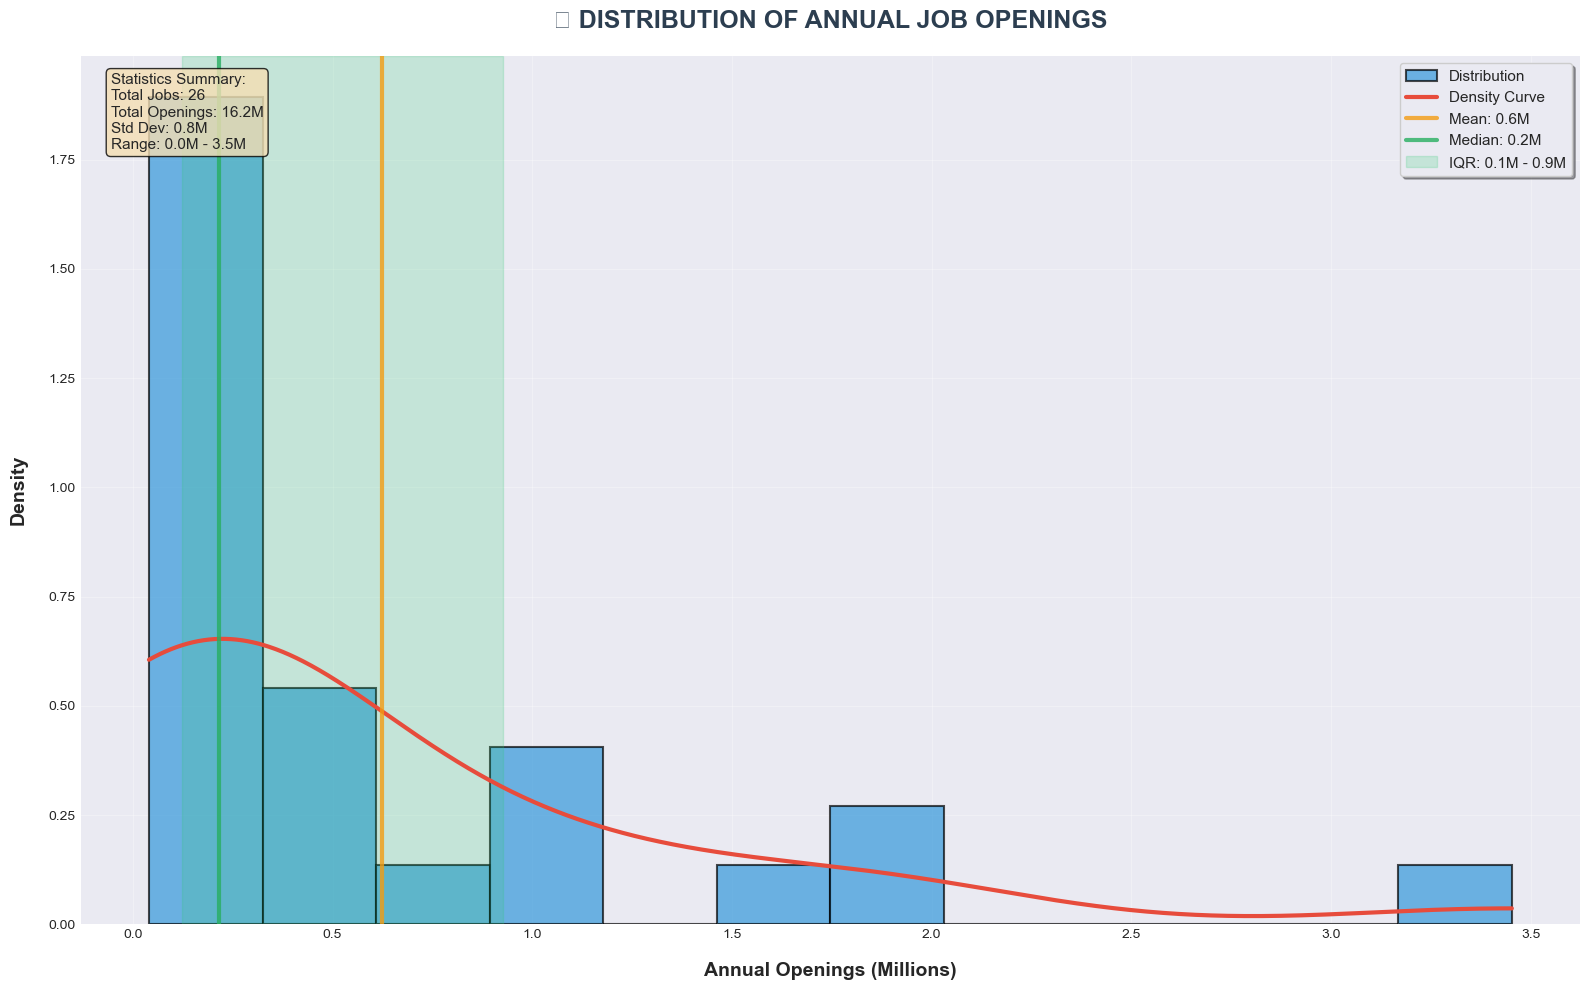

In [17]:
plt.figure(figsize=(16, 10))

# Create histogram with KDE
hist, bins, patches = plt.hist(data['Annual openings (BLS)']/1000000, 
                               bins=12, color='#3498DB', alpha=0.7, 
                               edgecolor='black', linewidth=1.5, 
                               density=True, label='Distribution')

# Add KDE curve
from scipy.stats import gaussian_kde
kde = gaussian_kde(data['Annual openings (BLS)']/1000000)
x_range = np.linspace(data['Annual openings (BLS)'].min()/1000000, 
                      data['Annual openings (BLS)'].max()/1000000, 1000)
plt.plot(x_range, kde(x_range), color='#E74C3C', linewidth=3, 
         label='Density Curve')

# Add vertical lines for statistics
mean_val = data['Annual openings (BLS)'].mean()/1000000
median_val = data['Annual openings (BLS)'].median()/1000000

plt.axvline(mean_val, color='#F39C12', linestyle='-', linewidth=3, 
            alpha=0.8, label=f'Mean: {mean_val:.1f}M')
plt.axvline(median_val, color='#27AE60', linestyle='-', linewidth=3, 
            alpha=0.8, label=f'Median: {median_val:.1f}M')

# Highlight the interquartile range
q25 = data['Annual openings (BLS)'].quantile(0.25)/1000000
q75 = data['Annual openings (BLS)'].quantile(0.75)/1000000
plt.axvspan(q25, q75, alpha=0.2, color='#2ECC71', 
            label=f'IQR: {q25:.1f}M - {q75:.1f}M')

plt.xlabel('Annual Openings (Millions)', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Density', fontsize=14, fontweight='bold', labelpad=15)
plt.title('📈 DISTRIBUTION OF ANNUAL JOB OPENINGS', 
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

plt.legend(fontsize=11, loc='upper right', frameon=True, 
           fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)

# Add statistics box
stats_text = f'Statistics Summary:\n'
stats_text += f'Total Jobs: {len(data):,}\n'
stats_text += f'Total Openings: {data["Annual openings (BLS)"].sum()/1e6:.1f}M\n'
stats_text += f'Std Dev: {data["Annual openings (BLS)"].std()/1e6:.1f}M\n'
stats_text += f'Range: {data["Annual openings (BLS)"].min()/1e6:.1f}M - {data["Annual openings (BLS)"].max()/1e6:.1f}M'

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

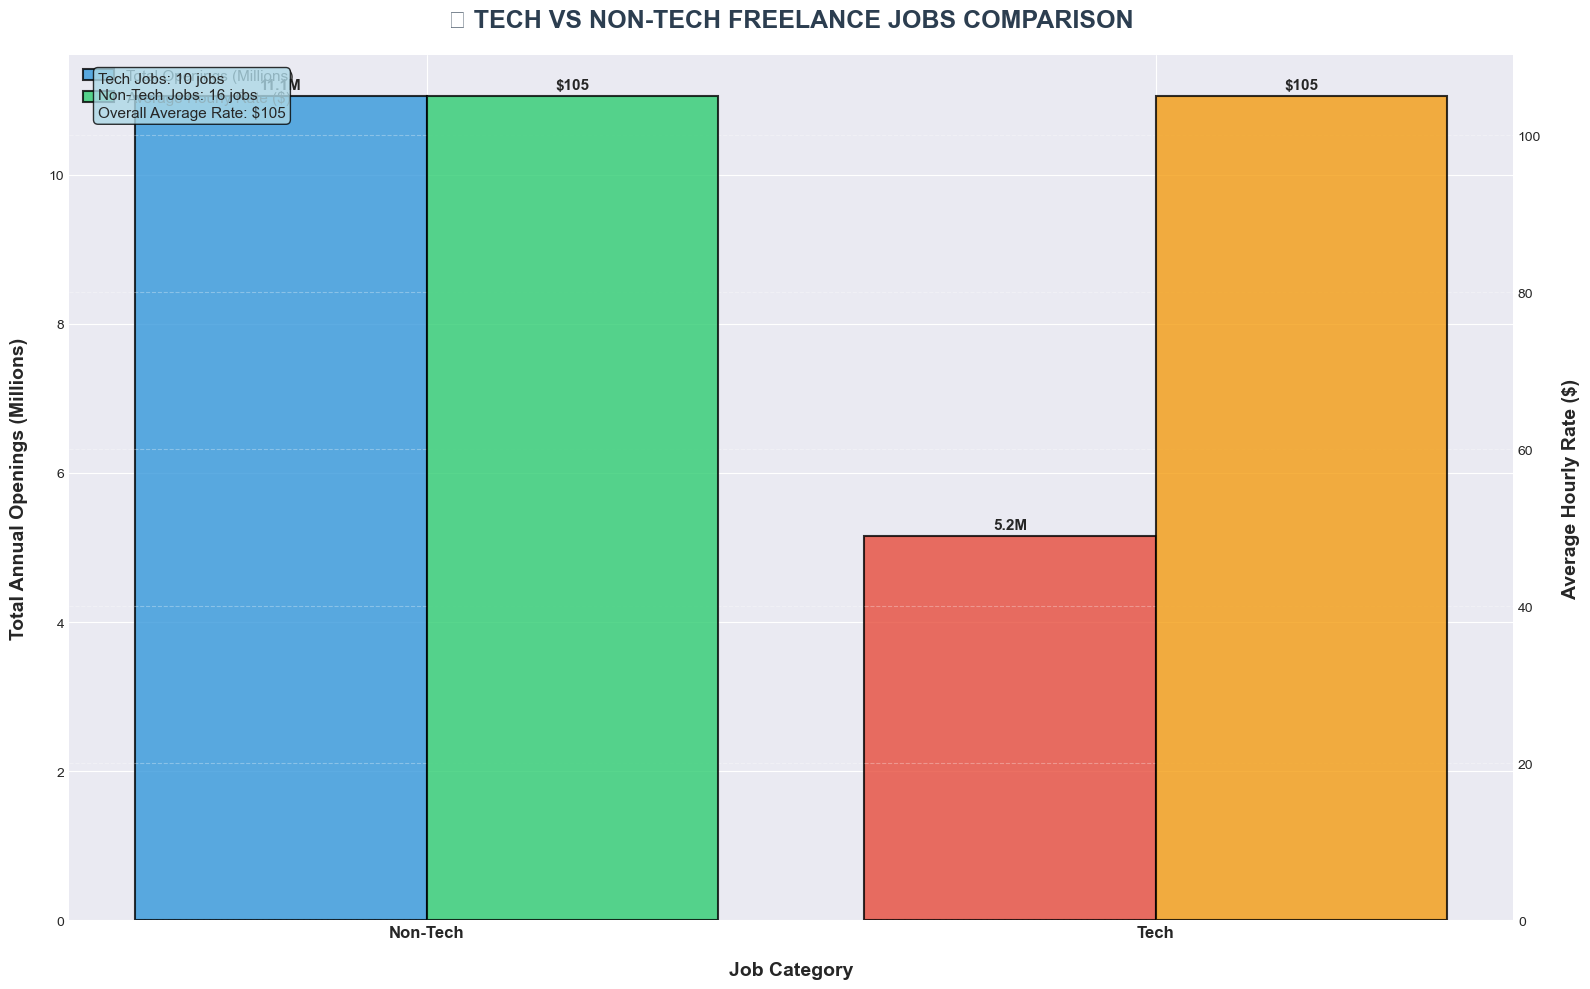

In [18]:
plt.figure(figsize=(16, 10))

# Define tech vs non-tech categories (simplified classification)
tech_keywords = ['engineer', 'developer', 'AI', 'data', 'machine learning', 
                 'cyber', 'blockchain', 'UX', 'web', 'mobile', 'IT', 
                 'programmer', 'SEO', 'digital']

def classify_job(title):
    title_lower = title.lower()
    for keyword in tech_keywords:
        if keyword in title_lower:
            return 'Tech'
    return 'Non-Tech'

data['Category'] = data['Job title'].apply(classify_job)

# Group by category
category_stats = data.groupby('Category').agg({
    'Annual openings (BLS)': ['sum', 'mean', 'count'],
    'Hourly rate avg': 'mean'
}).round(2)

# Create comparison bars
categories = category_stats.index
x = np.arange(len(categories))

fig, ax1 = plt.subplots(figsize=(16, 10))

# Bar chart for total openings
bars1 = ax1.bar(x - 0.2, category_stats[('Annual openings (BLS)', 'sum')]/1000000, 
                0.4, color=['#3498DB', '#E74C3C'], alpha=0.8, 
                edgecolor='black', linewidth=1.5, label='Total Openings (Millions)')

# Bar chart for average rate
ax2 = ax1.twinx()
bars2 = ax2.bar(x + 0.2, category_stats[('Hourly rate avg', 'mean')], 
                0.4, color=['#2ECC71', '#F39C12'], alpha=0.8, 
                edgecolor='black', linewidth=1.5, label='Average Hourly Rate ($)')

# Customize axes
ax1.set_xlabel('Job Category', fontsize=14, fontweight='bold', labelpad=15)
ax1.set_ylabel('Total Annual Openings (Millions)', fontsize=14, fontweight='bold', labelpad=15)
ax2.set_ylabel('Average Hourly Rate ($)', fontsize=14, fontweight='bold', labelpad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}M', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'${height:.0f}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.title('📊 TECH VS NON-TECH FREELANCE JOBS COMPARISON', 
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

# Add statistics annotation
stats_text = f'Tech Jobs: {len(data[data["Category"] == "Tech"])} jobs\n'
stats_text += f'Non-Tech Jobs: {len(data[data["Category"] == "Non-Tech"])} jobs\n'
stats_text += f'Overall Average Rate: ${data["Hourly rate avg"].mean():.0f}'

plt.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()